In [40]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123280 sha256=2507acae1eec262d9043c13a8598367db787b173d11a9ff1d0a744970d996553
  Stored in directory: /tmp/pip-ephem-wheel-cache-qz5y5jnr/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos4_nodes.sg",
                      path_links=path_directory + "erdos4_links.sg")
S.describe()

Nb of Nodes :  7
Nb of segmented nodes :  7.0
Nb of links :  18
Nb of segmented links :  28.0
Nb of event times :  27


In [2]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


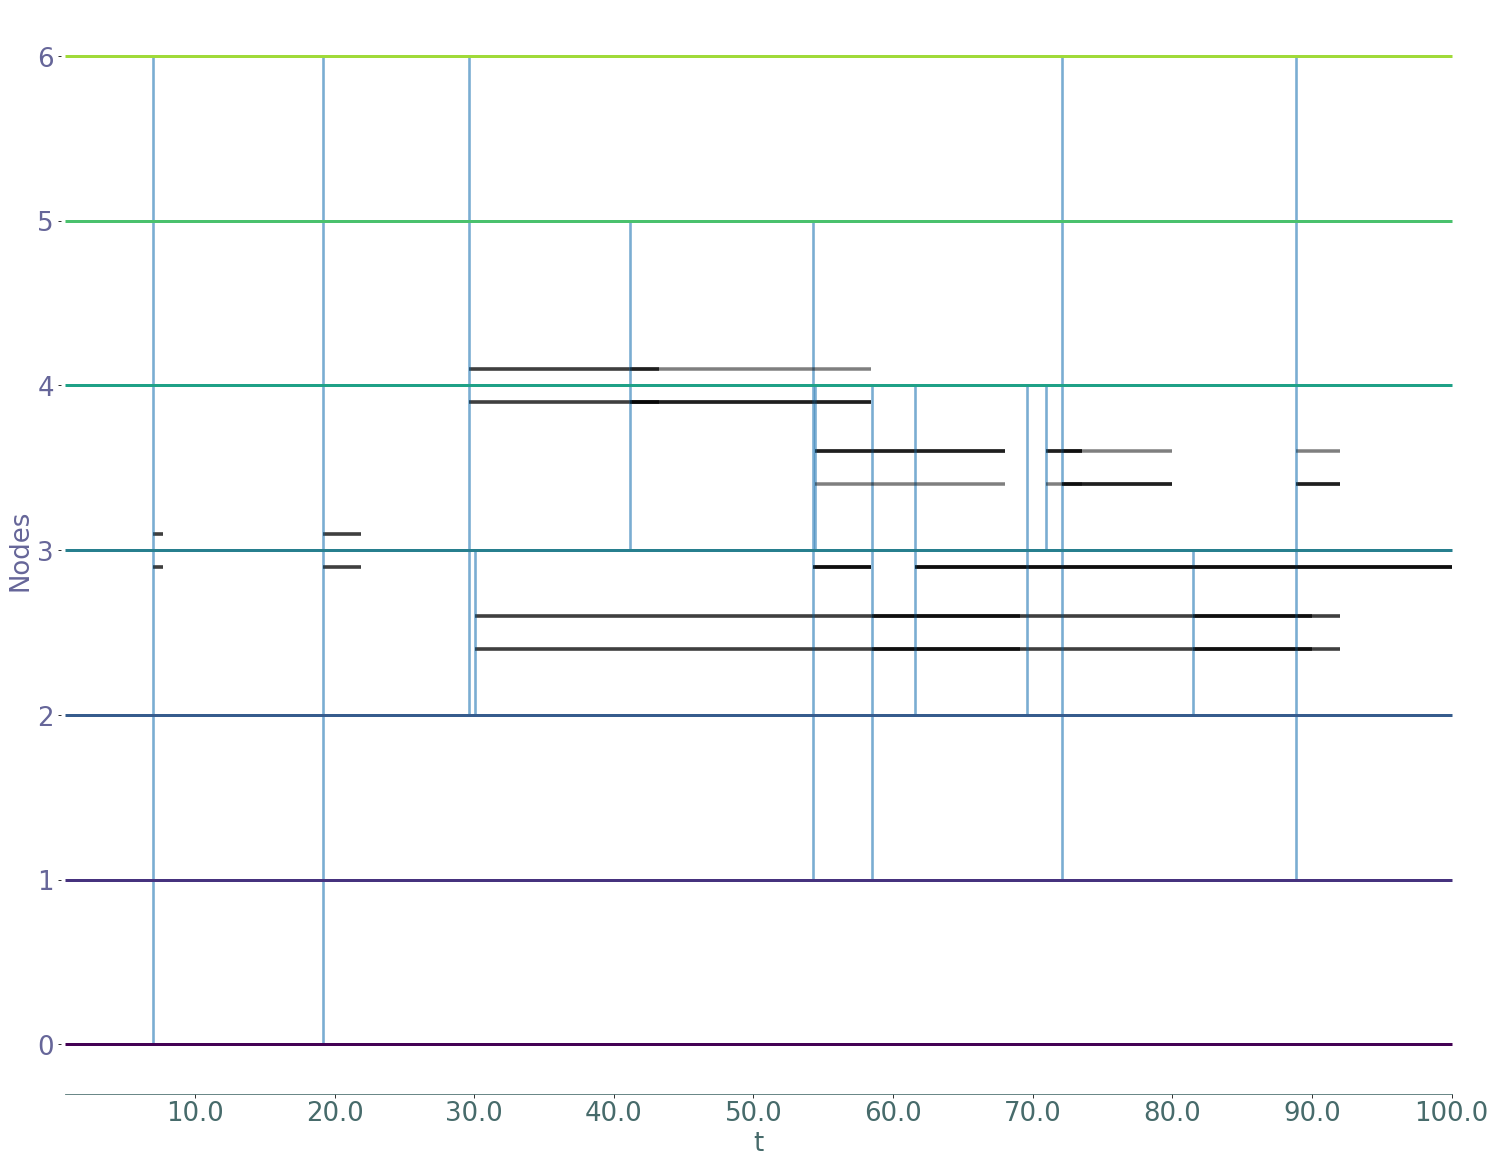

In [3]:
S.plot()

In [4]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [5]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [6]:
events, events_reverse = bt.events_dic(nouveau)

In [7]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [8]:
node = 6

In [9]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [10]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [11]:
lat_triplet[3]

[[30.066900040240178, 30.066900040240178, 2],
 [41.18266119186523, 41.18266119186523, 2],
 [43.20861816893123, 43.20861816893123, 2],
 [72.13340058339028, 72.13340058339028, 3],
 [73.50359888373906, 73.50359888373906, 3],
 [79.96710253478658, 81.49450029381379, 4],
 [88.84119756031919, 88.84119756031919, 4],
 [90.01182075351332, 90.01182075351332, 4]]

In [12]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

In [13]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(3,81.49450029381379)):
        print(path)

[(6, 79.96710253478658), (1, 79.96710253478658), (4, 79.96710253478658), (2, 79.96710253478658), (3, 81.49450029381379)]
[(6, 79.96710253478658), (1, 79.96710253478658), (4, 79.96710253478658), (2, 81.49450029381379), (3, 81.49450029381379)]
[(6, 79.96710253478658), (1, 79.96710253478658), (4, 81.49450029381379), (2, 81.49450029381379), (3, 81.49450029381379)]


In [14]:
sigma_r[ (1, 79.96710253478658)]

NameError: name 'sigma_r' is not defined

In [15]:
GT[(86.96128165180458 ,87.50135191009633)].graph[(3, 86.96128165180458)]

KeyError: (86.96128165180458, 87.50135191009633)

In [16]:
GT[(86.96128165180458 ,87.50135191009633)].graph[(3, 86.96128165180458)]

KeyError: (86.96128165180458, 87.50135191009633)

In [17]:
cur_best[4]

{0.6834828486469102: (-inf, inf),
 7.019389720967818: (-inf, inf),
 7.6756378286387426: (-inf, inf),
 19.183559836963102: (-inf, inf),
 21.858121399769864: (-inf, inf),
 29.60435405774298: (-inf, inf),
 30.066900040240178: (-inf, inf),
 41.18266119186523: (-inf, inf),
 43.20861816893123: (-inf, inf),
 54.278643052149015: (-inf, inf),
 54.44303181777067: (43.20861816893123, 3),
 58.436696135020085: (43.20861816893123, 3),
 58.51067902088869: (43.20861816893123, 3),
 61.55169819227122: (43.20861816893123, 2),
 68.04041227484754: (43.20861816893123, 2),
 69.1274499599022: (43.20861816893123, 2),
 69.56169995221181: (43.20861816893123, 2),
 69.5706245894795: (43.20861816893123, 2),
 70.95868453710477: (43.20861816893123, 2),
 72.13340058339028: (72.13340058339028, 2),
 73.50359888373906: (73.50359888373906, 2),
 79.96710253478658: (79.96710253478658, 2),
 81.49450029381379: (79.96710253478658, 2),
 88.84119756031919: (88.84119756031919, 2),
 90.01182075351332: (90.01182075351332, 2),
 92.0

In [18]:
pre[0]

{0.6834828486469102: {},
 7.019389720967818: {(6, 7.019389720967818): (7.019389720967818,
   7.019389720967818)},
 7.6756378286387426: {(6, 7.6756378286387426): (7.019389720967818,
   7.6756378286387426)},
 19.183559836963102: {(6, 19.183559836963102): (19.183559836963102,
   19.183559836963102)},
 21.858121399769864: {(6, 21.858121399769864): (19.183559836963102,
   21.858121399769864)},
 29.60435405774298: {},
 30.066900040240178: {},
 41.18266119186523: {},
 43.20861816893123: {},
 54.278643052149015: {},
 54.44303181777067: {},
 58.436696135020085: {},
 58.51067902088869: {},
 61.55169819227122: {},
 68.04041227484754: {},
 69.1274499599022: {},
 69.56169995221181: {},
 69.5706245894795: {},
 70.95868453710477: {},
 72.13340058339028: {},
 73.50359888373906: {},
 79.96710253478658: {},
 81.49450029381379: {},
 88.84119756031919: {},
 90.01182075351332: {},
 92.02119665755635: {},
 100.0: {}}

In [19]:
nouveau.link_presence[2]

[7.019389720967818, 7.6756378286387426, 19.183559836963102, 21.858121399769864]

In [20]:
edge = bt.edges(nouveau)

In [21]:
edge[0][3]

KeyError: 3

In [22]:
edge[3][4]

{54.44303181777067: (54.44303181777067, 54.44303181777067),
 58.436696135020085: (54.44303181777067, 58.436696135020085),
 58.51067902088869: (58.436696135020085, 58.51067902088869),
 61.55169819227122: (58.51067902088869, 61.55169819227122),
 68.04041227484754: (61.55169819227122, 68.04041227484754),
 70.95868453710477: (70.95868453710477, 70.95868453710477),
 72.13340058339028: (70.95868453710477, 72.13340058339028),
 73.50359888373906: (72.13340058339028, 73.50359888373906)}

In [23]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

6 0 7.019389720967818 -1 -1 -1 -1
edge after 7.019389720967818 7.6756378286387426
t1p,t2p 7.019389720967818 7.019389720967818
6 0 7.6756378286387426 -1 -1 -1 -1
edge after 19.183559836963102 19.183559836963102
t1p,t2p 7.019389720967818 7.6756378286387426
6 0 19.183559836963102 -1 -1 -1 -1
edge after 19.183559836963102 21.858121399769864
t1p,t2p 19.183559836963102 19.183559836963102
6 0 21.858121399769864 -1 -1 -1 -1
t1p,t2p 19.183559836963102 21.858121399769864
6 1 72.13340058339028 -1 -1 -1 -1
edge after 72.13340058339028 73.50359888373906
t1p,t2p 72.13340058339028 72.13340058339028
1 4 72.13340058339028 72.13340058339028 72.13340058339028 72.13340058339028 73.50359888373906
edge after 72.13340058339028 73.50359888373906
t1p,t2p 70.95868453710477 72.13340058339028
4 2 72.13340058339028 72.13340058339028 72.13340058339028 72.13340058339028 73.50359888373906
edge after 72.13340058339028 73.50359888373906
t1p,t2p 70.95868453710477 72.13340058339028
4 3 72.13340058339028 72.13340058339028

In [24]:
for e in G.graph[(3,77.72417383674939)]:
    print(e)

KeyError: (3, 77.72417383674939)

In [25]:
G.graph[(3,77.72417383674939)][(1, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [26]:
G.graph[(3,77.72417383674939)][(5, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [27]:
after[4]

{0.6834828486469102: False,
 7.019389720967818: False,
 7.6756378286387426: False,
 19.183559836963102: False,
 21.858121399769864: False,
 29.60435405774298: False,
 30.066900040240178: False,
 41.18266119186523: False,
 43.20861816893123: False,
 54.278643052149015: False,
 54.44303181777067: False,
 58.436696135020085: False,
 58.51067902088869: False,
 61.55169819227122: False,
 68.04041227484754: False,
 69.1274499599022: False,
 69.56169995221181: False,
 69.5706245894795: False,
 70.95868453710477: False,
 72.13340058339028: True,
 73.50359888373906: True,
 79.96710253478658: False,
 81.49450029381379: False,
 88.84119756031919: True,
 90.01182075351332: True,
 92.02119665755635: False,
 100.0: False}

In [28]:
before[4]

{0.6834828486469102: False,
 7.019389720967818: False,
 7.6756378286387426: False,
 19.183559836963102: False,
 21.858121399769864: False,
 29.60435405774298: False,
 30.066900040240178: False,
 41.18266119186523: False,
 43.20861816893123: False,
 54.278643052149015: False,
 54.44303181777067: False,
 58.436696135020085: False,
 58.51067902088869: False,
 61.55169819227122: False,
 68.04041227484754: False,
 69.1274499599022: False,
 69.56169995221181: False,
 69.5706245894795: False,
 70.95868453710477: False,
 72.13340058339028: False,
 73.50359888373906: True,
 79.96710253478658: True,
 81.49450029381379: False,
 88.84119756031919: False,
 90.01182075351332: True,
 92.02119665755635: True,
 100.0: False}

In [29]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [30]:
sigma_r

{(0, 0.6834828486469102): vol(0,0),
 (0, 7.019389720967818): vol(1,0),
 (0, 7.6756378286387426): vol(1,0),
 (0, 19.183559836963102): vol(1,0),
 (0, 21.858121399769864): vol(1,0),
 (0, 29.60435405774298): vol(1,0),
 (0, 30.066900040240178): vol(1,0),
 (0, 41.18266119186523): vol(1,0),
 (0, 43.20861816893123): vol(1,0),
 (0, 54.278643052149015): vol(1,0),
 (0, 54.44303181777067): vol(1,0),
 (0, 58.436696135020085): vol(1,0),
 (0, 58.51067902088869): vol(1,0),
 (0, 61.55169819227122): vol(1,0),
 (0, 68.04041227484754): vol(1,0),
 (0, 69.1274499599022): vol(1,0),
 (0, 69.56169995221181): vol(1,0),
 (0, 69.5706245894795): vol(1,0),
 (0, 70.95868453710477): vol(1,0),
 (0, 72.13340058339028): vol(1,0),
 (0, 73.50359888373906): vol(1,0),
 (0, 79.96710253478658): vol(1,0),
 (0, 81.49450029381379): vol(1,0),
 (0, 88.84119756031919): vol(1,0),
 (0, 90.01182075351332): vol(1,0),
 (0, 92.02119665755635): vol(1,0),
 (0, 100.0): vol(1,0),
 (1, 0.6834828486469102): vol(0,0),
 (1, 7.019389720967818): v

In [31]:
sigma_r[(4, 87.50135191009633)]

KeyError: (4, 87.50135191009633)

In [32]:
sigma_r[(4, 66.38830461464687)]

KeyError: (4, 66.38830461464687)

In [33]:
GG.l_nei[(1, 79.96710253478658)]

[[79.96710253478658, [4]], [81.49450029381379, [4]]]

In [34]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [35]:
prev_next[4]

{}

In [36]:
contri[3]

{30.066900040240178: (0.6834828486469102, 30.066900040240178),
 41.18266119186523: (41.18266119186523, 41.18266119186523),
 43.20861816893123: (43.20861816893123, 100.0),
 72.13340058339028: (43.20861816893123, 72.13340058339028),
 73.50359888373906: (73.50359888373906, 100.0),
 81.49450029381379: (73.50359888373906, 88.84119756031919),
 88.84119756031919: (73.50359888373906, 88.84119756031919),
 90.01182075351332: (90.01182075351332, 100.0)}

In [37]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [38]:
deltasvvt

{(6, 7.019389720967818): vol(0,0),
 (0, 7.019389720967818): vol(0,0),
 (6, 7.6756378286387426): vol(0,0),
 (0, 7.6756378286387426): vol(0,0),
 (6, 19.183559836963102): vol(0,0),
 (0, 19.183559836963102): vol(0,0),
 (6, 21.858121399769864): vol(0,0),
 (0, 21.858121399769864): vol(0,0),
 (5, 43.20861816893123): vol(0,0),
 (1, 54.278643052149015): vol(759.2759801269005,0),
 (5, 54.278643052149015): vol(0,0),
 (1, 54.44303181777067): vol(0,0),
 (5, 54.44303181777067): vol(0,0),
 (1, 58.436696135020085): vol(0,0),
 (5, 58.436696135020085): vol(0,0),
 (4, 54.44303181777067): vol(752.2853256237051,0),
 (1, 58.51067902088869): vol(0,0),
 (4, 58.436696135020085): vol(0,0),
 (4, 58.51067902088869): vol(0,0),
 (4, 61.55169819227122): vol(0,0),
 (1, 61.55169819227122): vol(0,0),
 (1, 68.04041227484754): vol(0,0),
 (4, 68.04041227484754): vol(0,0),
 (1, 69.1274499599022): vol(0,0),
 (4, 69.1274499599022): vol(0,0),
 (1, 69.56169995221181): vol(0,0),
 (4, 69.56169995221181): vol(0,0),
 (1, 69.570624

In [39]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

cas cont w_tp 4 81.49450029381379 yptpp 4 81.49450029381379
s vol(0,0) sigma_r[(v,t)] vol(1,0) sigma_r[(yp,tpp)] vol(1.5273977590272096,1) contribution[yp][tpp] vol(0,0) kappa(r,tpp,ev_prev) vol(1.5273977590272096,1)
cas cont w_tp 4 81.49450029381379 yptpp 2 81.49450029381379
s vol(47.48540460519848,0) sigma_r[(v,t)] vol(1,0) sigma_r[(yp,tpp)] vol(1.166471957140671,2) contribution[yp][tpp] vol(47.48540460519848,0) kappa(r,tpp,ev_prev) vol(1.166471957140671,2)
partial_sum {81.49450029381379: vol(47.48540460519848,0)} w_tp 4 81.49450029381379
cas discret w_tp 4 79.96710253478658
s vol(47.48540460519848,0)
partial_sum {81.49450029381379: vol(47.48540460519848,0), 79.96710253478658: vol(47.48540460519848,0)} w_tp 4 79.96710253478658


In [40]:
contribution

{0: {7.019389720967818: vol(0,0),
  7.6756378286387426: vol(0,0),
  19.183559836963102: vol(0,0),
  21.858121399769864: vol(0,0),
  0.6834828486469102: vol(0,0),
  29.60435405774298: vol(0,0),
  30.066900040240178: vol(0,0),
  41.18266119186523: vol(0,0),
  43.20861816893123: vol(0,0),
  54.278643052149015: vol(0,0),
  54.44303181777067: vol(0,0),
  58.436696135020085: vol(0,0),
  58.51067902088869: vol(0,0),
  61.55169819227122: vol(0,0),
  68.04041227484754: vol(0,0),
  69.1274499599022: vol(0,0),
  69.56169995221181: vol(0,0),
  69.5706245894795: vol(0,0),
  70.95868453710477: vol(0,0),
  72.13340058339028: vol(0,0),
  73.50359888373906: vol(0,0),
  79.96710253478658: vol(0,0),
  81.49450029381379: vol(0,0),
  88.84119756031919: vol(0,0),
  90.01182075351332: vol(0,0),
  92.02119665755635: vol(0,0),
  100.0: vol(0,0)},
 6: {7.019389720967818: vol(0,0),
  7.6756378286387426: vol(0,0),
  19.183559836963102: vol(0,0),
  21.858121399769864: vol(0,0),
  72.13340058339028: vol(0,0),
  73.

In [41]:
contribution[1]

{72.13340058339028: vol(0,0),
 73.50359888373906: vol(0,0),
 81.49450029381379: vol(0,0),
 79.96710253478658: vol(47.48540460519848,0),
 88.84119756031919: vol(0,0),
 90.01182075351332: vol(0,0),
 92.02119665755635: vol(0,0),
 70.95868453710477: vol(0,0),
 69.5706245894795: vol(0,0),
 69.56169995221181: vol(0,0),
 69.1274499599022: vol(0,0),
 68.04041227484754: vol(0,0),
 61.55169819227122: vol(0,0),
 58.51067902088869: vol(0,0),
 58.436696135020085: vol(0,0),
 54.44303181777067: vol(0,0),
 54.278643052149015: vol(759.2759801269005,0),
 0.6834828486469102: vol(0,0),
 7.019389720967818: vol(0,0),
 7.6756378286387426: vol(0,0),
 19.183559836963102: vol(0,0),
 21.858121399769864: vol(0,0),
 29.60435405774298: vol(0,0),
 30.066900040240178: vol(0,0),
 41.18266119186523: vol(0,0),
 43.20861816893123: vol(0,0),
 100.0: vol(0,0)}